In [1]:
from shapely.geometry import Point, Polygon
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
import folium
import seaborn as sns
import pickle
import json

from folium import plugins
from folium.plugins import HeatMap


In [2]:
may_df = pd.read_csv('data/may_trip.csv')
may_df.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000


### SET PARAMETERS FOR SUBSETTING

In [3]:
may_trip = may_df.query('tripDistance >= 1320')
may_trip.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000


In [4]:
may_trip = may_trip.query('5 <=tripDuration<=120')
may_trip.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
8,2019-05-01 00:10:56.013000,Bird,BRD2193,PoweredSX2AW,6.0,2624.672,2019-05-01 00:00:00,00:06:34.436666,2019-05-01 00:00:00,00:12:48.676666,36.1708,-86.7893,36.1746,-86.7860,"[[36.170995,-86.789593],[36.173193,-86.791207]...",2019-05-02 05:30:24.833000
9,2019-05-01 00:10:56.013000,Bird,BRD2194,PoweredL968V,6.0,2624.672,2019-05-01 00:00:00,00:05:36.870000,2019-05-01 00:00:00,00:11:19.183333,36.1565,-86.7971,36.1512,-86.7968,"[[36.15654,-86.797137],[36.153065,-86.798047],...",2019-05-02 05:30:24.920000


In [5]:
may_12_time = may_trip.query('startDate < "2019-05-13" & startDate >= "2019-05-12" & endDate < "2019-05-13"')
may_12_time.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
71065,2019-05-12 00:07:50.643000,Lyft,LFT16,Powered849206,6.591383,2004.59324,2019-05-12 00:00:00,00:01:15.003333,2019-05-12 00:00:00,00:07:50.486666,36.15884,-86.77448,36.15946,-86.77439,"[[36.15884,-86.77448],[36.15883,-86.77442],[36...",2019-05-13 10:57:17.813000
71066,2019-05-12 00:08:16.503000,Lyft,LFT17,Powered158534,6.036917,2109.58012,2019-05-12 00:00:00,00:02:14.196666,2019-05-12 00:00:00,00:08:16.410000,36.17824,-86.78696,36.17350,-86.78546,"[[36.17824,-86.78696],[36.17784,-86.78669],[36...",2019-05-13 10:57:17.853000


In [6]:
may_time = may_12_time.query('startTime >= "20:00:00" & endTime <="22:00:00"')
may_time.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
76053,2019-05-12 20:04:41.420000,Bird,BRD1879,PoweredR8DM1,6.0,1968.504,2019-05-12 00:00:00,20:00:32.996666,2019-05-12 00:00:00,20:06:35.686666,36.160,-86.7788,36.1601,-86.7837,"[[36.160525,-86.778814],[36.15905,-86.782002],...",2019-05-13 05:31:25.253000
76084,2019-05-12 20:09:41.667000,Bird,BRD1901,Powered5ZVXC,8.0,2624.672,2019-05-12 00:00:00,20:01:35.690000,2019-05-12 00:00:00,20:09:55.346666,36.166,-86.7780,36.1616,-86.7758,"[[36.166154,-86.777889],[36.165824,-86.778102]...",2019-05-13 05:31:25.583000


### CREATE 'GEOMETRY' AND GEOPANDAS DATAFRAME

In [7]:
neighborhoods = gpd.read_file('data/Neighborhood Association Boundaries (GIS).geojson')

In [8]:
may_time['geometry'] = may_time.apply(lambda x: Point((float(x.startLongitude), float(x.startLatitude))), axis=1)
may_time.head(2)

C:\Users\tamsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
76053,2019-05-12 20:04:41.420000,Bird,BRD1879,PoweredR8DM1,6.0,1968.504,2019-05-12 00:00:00,20:00:32.996666,2019-05-12 00:00:00,20:06:35.686666,36.160,-86.7788,36.1601,-86.7837,"[[36.160525,-86.778814],[36.15905,-86.782002],...",2019-05-13 05:31:25.253000,POINT (-86.7788 36.16)
76084,2019-05-12 20:09:41.667000,Bird,BRD1901,Powered5ZVXC,8.0,2624.672,2019-05-12 00:00:00,20:01:35.690000,2019-05-12 00:00:00,20:09:55.346666,36.166,-86.7780,36.1616,-86.7758,"[[36.166154,-86.777889],[36.165824,-86.778102]...",2019-05-13 05:31:25.583000,POINT (-86.77800000000001 36.166)


In [9]:
scooter_geo = gpd.GeoDataFrame(may_time, crs = neighborhoods.crs, geometry = may_time['geometry'])

scooter_geo

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
76053,2019-05-12 20:04:41.420000,Bird,BRD1879,PoweredR8DM1,6.000000,1968.50400,2019-05-12 00:00:00,20:00:32.996666,2019-05-12 00:00:00,20:06:35.686666,36.160000,-86.778800,36.160100,-86.783700,"[[36.160525,-86.778814],[36.15905,-86.782002],...",2019-05-13 05:31:25.253000,POINT (-86.7788 36.16)
76084,2019-05-12 20:09:41.667000,Bird,BRD1901,Powered5ZVXC,8.000000,2624.67200,2019-05-12 00:00:00,20:01:35.690000,2019-05-12 00:00:00,20:09:55.346666,36.166000,-86.778000,36.161600,-86.775800,"[[36.166154,-86.777889],[36.165824,-86.778102]...",2019-05-13 05:31:25.583000,POINT (-86.77800000000001 36.166)
76104,2019-05-12 20:13:26.853000,Lyft,LFT1581,Powered405803,9.737267,3694.22584,2019-05-12 00:00:00,20:03:42.523333,2019-05-12 00:00:00,20:13:26.760000,36.154790,-86.777060,36.150950,-86.783730,"[[36.15479,-86.77706],[36.15473,-86.77708],[36...",2019-05-13 10:58:20.590000,POINT (-86.77706000000001 36.15479)
76105,2019-05-12 20:13:41.630000,Lyft,LFT1582,Powered972276,9.255067,2585.30192,2019-05-12 00:00:00,20:04:26.200000,2019-05-12 00:00:00,20:13:41.503333,36.156480,-86.774340,36.154670,-86.774580,"[[36.15648,-86.77434],[36.15643,-86.77429],[36...",2019-05-13 10:58:20.620000,POINT (-86.77434 36.15648)
76135,2019-05-12 20:14:23.260000,Lyft,LFT1584,Powered623986,10.654100,3589.23896,2019-05-12 00:00:00,20:03:43.903333,2019-05-12 00:00:00,20:14:23.150000,36.154770,-86.776980,36.150900,-86.783730,"[[36.15477,-86.77698],[36.1548,-86.77704],[36....",2019-05-13 10:58:20.680000,POINT (-86.77697999999999 36.15477)
76137,2019-05-12 20:14:42.107000,Bird,BRD1924,Powered8GIGE,7.000000,1640.42000,2019-05-12 00:00:00,20:08:20.026666,2019-05-12 00:00:00,20:15:11.883333,36.158300,-86.772300,36.161900,-86.774300,"[[36.158335,-86.772059],[36.158532,-86.772108]...",2019-05-13 05:31:25.930000,POINT (-86.7723 36.1583)
76138,2019-05-12 20:14:42.107000,Bird,BRD1926,PoweredJ8EHS,12.000000,7788.71416,2019-05-12 00:00:00,20:03:38.323333,2019-05-12 00:00:00,20:15:50.930000,36.165400,-86.781500,36.177800,-86.777400,"[[36.165481,-86.781502],[36.165473,-86.781494]...",2019-05-13 05:31:25.997000,POINT (-86.78149999999999 36.1654)
76140,2019-05-12 20:14:42.107000,Bird,BRD1929,PoweredPV7BJ,13.000000,11811.02400,2019-05-12 00:00:00,20:02:30.083333,2019-05-12 00:00:00,20:16:00.073333,36.136600,-86.802300,36.149600,-86.779300,"[[36.136748,-86.802124],[36.136778,-86.801936]...",2019-05-13 05:31:26.087000,POINT (-86.8023 36.1366)
76144,2019-05-12 20:14:42.107000,Bird,BRD1925,Powered4819J,12.000000,6889.76400,2019-05-12 00:00:00,20:04:04.476666,2019-05-12 00:00:00,20:15:41.813333,36.165300,-86.781600,36.176700,-86.776400,"[[36.165754,-86.7815],[36.165819,-86.781807],[...",2019-05-13 05:31:25.963000,POINT (-86.7816 36.1653)
76147,2019-05-12 20:14:42.107000,Bird,BRD1928,Powered9LPEJ,12.000000,2624.67200,2019-05-12 00:00:00,20:02:36.046666,2019-05-12 00:00:00,20:14:42.930000,36.158000,-86.784100,36.160600,-86.778400,"[[36.158257999999996,-86.783983],[36.158941,-8...",2019-05-13 05:31:26.057000,POINT (-86.7841 36.158)


In [10]:
scooter_area = gpd.sjoin(scooter_geo, neighborhoods, op = 'within')
scooter_area.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry,index_right,name
76137,2019-05-12 20:14:42.107000,Bird,BRD1924,Powered8GIGE,7.0,1640.42000,2019-05-12 00:00:00,20:08:20.026666,2019-05-12 00:00:00,20:15:11.883333,36.1583,-86.7723,36.1619,-86.7743,"[[36.158335,-86.772059],[36.158532,-86.772108]...",2019-05-13 05:31:25.930000,POINT (-86.7723 36.1583),43,Urban Residents
76138,2019-05-12 20:14:42.107000,Bird,BRD1926,PoweredJ8EHS,12.0,7788.71416,2019-05-12 00:00:00,20:03:38.323333,2019-05-12 00:00:00,20:15:50.930000,36.1654,-86.7815,36.1778,-86.7774,"[[36.165481,-86.781502],[36.165473,-86.781494]...",2019-05-13 05:31:25.997000,POINT (-86.78149999999999 36.1654),43,Urban Residents


### GROUP NEIGHBORHOODS BY SUMDID'S

In [11]:
scooter_area2 = scooter_area[['name', 'sumdID']].groupby('name').agg('count').sort_values(by ='sumdID', ascending = False)
scooter_area2

,sumdID
name,
Urban Residents,105
Hillsboro-West End,10
Germantown,6
Sunnyside,6
Lockeland Springs,5
Belmont-Hillsboro,4
Edgehill (ONE),3
Maxwell Heights,3
East End,2


### DETERMINE AREA OF NEIGHBORHOODS(POLYGONS) AND CREATE 'AREA' COLUMN

In [12]:
area = neighborhoods.copy()
area= area.to_crs({'init': 'epsg:3857'})
area.crs
area.head(2)

,name,geometry
0,Historic Buena Vista,(POLYGON ((-9661987.511770535 4324832.65702707...
1,Charlotte Park,(POLYGON ((-9670835.866014268 4322325.44668748...


In [13]:
area["area"] = area['geometry'].area/ (10**6)*.386102
area.head(2)

,name,geometry,area
0,Historic Buena Vista,(POLYGON ((-9661987.511770535 4324832.65702707...,0.219658
1,Charlotte Park,(POLYGON ((-9670835.866014268 4322325.44668748...,1.623775


In [14]:
area_name = area.set_index('name')
area_name.head(2)

,geometry,area
name,,
Historic Buena Vista,(POLYGON ((-9661987.511770535 4324832.65702707...,0.219658
Charlotte Park,(POLYGON ((-9670835.866014268 4322325.44668748...,1.623775


### CREATE 2ND GPD DATAFRAME TO SET CRS FOR 'AREA'

In [15]:
scooter_geo2 = gpd.GeoDataFrame(scooter_area, crs = area.crs, geometry = scooter_area['geometry'])

scooter_geo2.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry,index_right,name
76137,2019-05-12 20:14:42.107000,Bird,BRD1924,Powered8GIGE,7.0,1640.42000,2019-05-12 00:00:00,20:08:20.026666,2019-05-12 00:00:00,20:15:11.883333,36.1583,-86.7723,36.1619,-86.7743,"[[36.158335,-86.772059],[36.158532,-86.772108]...",2019-05-13 05:31:25.930000,POINT (-86.7723 36.1583),43,Urban Residents
76138,2019-05-12 20:14:42.107000,Bird,BRD1926,PoweredJ8EHS,12.0,7788.71416,2019-05-12 00:00:00,20:03:38.323333,2019-05-12 00:00:00,20:15:50.930000,36.1654,-86.7815,36.1778,-86.7774,"[[36.165481,-86.781502],[36.165473,-86.781494]...",2019-05-13 05:31:25.997000,POINT (-86.78149999999999 36.1654),43,Urban Residents


### MAKE NEIGHBORHOOD 'NAME' THE DF INDEX

In [16]:
scoot_ind = scooter_geo2.set_index('name')
scoot_ind.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry,index_right
name,,,,,,,,,,,,,,,,,,
Urban Residents,2019-05-12 20:14:42.107000,Bird,BRD1924,Powered8GIGE,7.0,1640.42000,2019-05-12 00:00:00,20:08:20.026666,2019-05-12 00:00:00,20:15:11.883333,36.1583,-86.7723,36.1619,-86.7743,"[[36.158335,-86.772059],[36.158532,-86.772108]...",2019-05-13 05:31:25.930000,POINT (-86.7723 36.1583),43
Urban Residents,2019-05-12 20:14:42.107000,Bird,BRD1926,PoweredJ8EHS,12.0,7788.71416,2019-05-12 00:00:00,20:03:38.323333,2019-05-12 00:00:00,20:15:50.930000,36.1654,-86.7815,36.1778,-86.7774,"[[36.165481,-86.781502],[36.165473,-86.781494]...",2019-05-13 05:31:25.997000,POINT (-86.78149999999999 36.1654),43


### MERGE 'AREA' AND NEWLY INDEXED DATAFRAMES

In [17]:
scooter_ind = pd.merge(area, scoot_ind, how='left', on='name')
scoot_na = scooter_ind.dropna()
scootGeog = scoot_na.rename(columns = {'geometry_y':'geometry'})
scootGeog.head()

,name,geometry_x,area,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,...,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry,index_right
0,Historic Buena Vista,(POLYGON ((-9661987.511770535 4324832.65702707...,0.219658,2019-05-12 21:54:30.307000,Lyft,LFT1928,Powered499390,5.049933,2322.83472,2019-05-12 00:00:00,...,2019-05-12 00:00:00,21:54:30.170000,36.17545,-86.79412,36.17989,-86.79300,"[[36.17545,-86.79412],[36.17548,-86.79407],[36...",2019-05-13 10:58:32.913000,POINT (-86.79412000000001 36.17545),0.0
16,Lockeland Springs,(POLYGON ((-9655775.826250033 4325921.26260729...,1.028566,2019-05-12 21:04:50.507000,Lyft,LFT1767,Powered163072,17.511167,7073.49104,2019-05-12 00:00:00,...,2019-05-12 00:00:00,21:04:50.346666,36.17388,-86.73676,36.18205,-86.73561,"[[36.17388,-86.73676],[36.17393,-86.73677],[36...",2019-05-13 10:58:27.150000,POINT (-86.73676 36.17388),16.0
17,Lockeland Springs,(POLYGON ((-9655775.826250033 4325921.26260729...,1.028566,2019-05-12 21:06:36.240000,Lyft,LFT1775,Powered935432,23.401733,7178.47792,2019-05-12 00:00:00,...,2019-05-12 00:00:00,21:06:35.150000,36.17387,-86.73677,36.18206,-86.73565,"[[36.17387,-86.73677],[36.17391,-86.7368],[36....",2019-05-13 10:58:27.367000,POINT (-86.73677000000001 36.17387),16.0
18,Lockeland Springs,(POLYGON ((-9655775.826250033 4325921.26260729...,1.028566,2019-05-12 21:47:34.690000,Lyft,LFT1899,Powered163072,10.728200,10557.74312,2019-05-12 00:00:00,...,2019-05-12 00:00:00,21:47:34.526666,36.18204,-86.73563,36.16654,-86.72651,"[[36.18204,-86.73563],[36.18206,-86.73568],[36...",2019-05-13 10:58:31.590000,POINT (-86.73563 36.18204),16.0
19,Lockeland Springs,(POLYGON ((-9655775.826250033 4325921.26260729...,1.028566,2019-05-12 21:52:29.603000,Lyft,LFT1915,Powered762706,16.653200,14094.48864,2019-05-12 00:00:00,...,2019-05-12 00:00:00,21:52:29.520000,36.17779,-86.75002,36.15707,-86.77532,"[[36.17779,-86.75002],[36.17769,-86.75004],[36...",2019-05-13 10:58:32.093000,POINT (-86.75002000000001 36.17779),16.0


In [18]:
area_name = area.set_index('name')
area_name.head(2)

,geometry,area
name,,
Historic Buena Vista,(POLYGON ((-9661987.511770535 4324832.65702707...,0.219658
Charlotte Park,(POLYGON ((-9670835.866014268 4322325.44668748...,1.623775


### CALCULATE SCOOTER DENSITY PER NEIGHBORHOOD.  DENSITY = SUMDID COUNT/AREA IN SQ^2 MILES

In [19]:
df_area_name = scooter_area2.join(area_name)
df_area_name = df_area_name.sort_values(by='sumdID', ascending=False)
df_area_name['density']= df_area_name['sumdID']/df_area_name['area']
df_area_name.head(2)

,sumdID,geometry,area,density
name,,,,
Urban Residents,105,(POLYGON ((-9660441.280680289 4323289.00479539...,0.435905,240.878093
Hillsboro-West End,10,(POLYGON ((-9665327.563208945 4319143.68606616...,1.942049,5.149202


In [20]:
df_dropNa = df_area_name.dropna()
df_dropNa = df_area_name.drop(columns=['geometry']) 
df_dropNa.head(2)

,sumdID,area,density
name,,,
Urban Residents,105,0.435905,240.878093
Hillsboro-West End,10,1.942049,5.149202


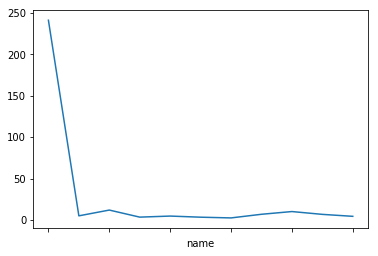

In [21]:
df_dropNa.density.plot('line')

### LINE PLOT VISUALIZATION OF SCOOTER DENSITY PER NEIGHBORHOOD

Text(0.5, 1.0, 'Scooter Density per Neighborhood==May 12_8-10pm')

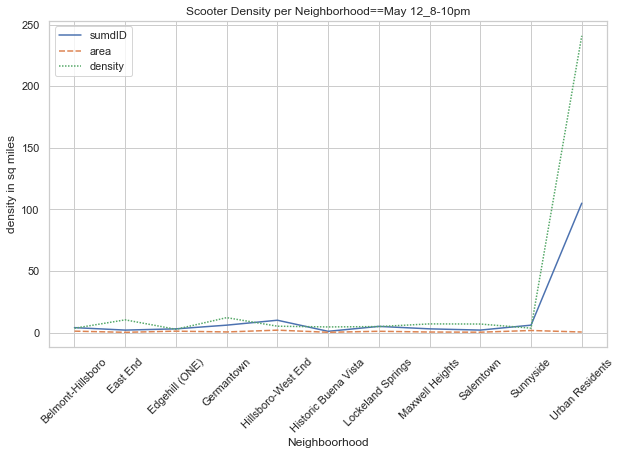

In [22]:
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df_dropNa)
plt.xticks(rotation=45)
plt.xlabel('Neighboorhood')
plt.ylabel('density in sq miles')
plt.title('Scooter Density per Neighborhood==May 12_8-10pm')

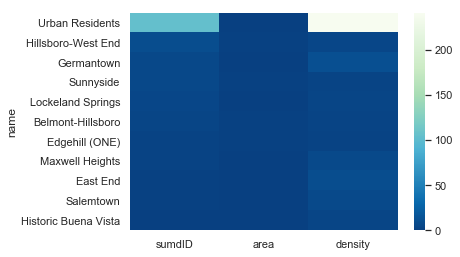

In [23]:
sns.heatmap(df_dropNa, cmap='GnBu_r')

In [24]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
name        288 non-null object
geometry    288 non-null object
dtypes: object(2)
memory usage: 4.6+ KB


In [25]:
### MAP OF START/STOP POINTS FOR SCOOTERS ON MAY 12

In [26]:
downtown = gpd.read_file('data/MDHA_Promise_Zones/Export_Output_5.shp')
m = folium.Map([36.161278209287914, -86.77756457127047], zoom_start=11)

for _, row in scootGeog.iterrows():
    trip = str(row['tripRecordNum'])
    scooter_id = str(row['sumdID'])
    start_loc = [row['startLatitude'], row['startLongitude']]
    start_time = str(row['startTime'])
    
    
    start_marker = folium.Marker(location = start_loc,
                  popup = scooter_id + ': ' + trip + '<br/>' + start_time,
                  icon=folium.Icon(color='green'))
    start_marker.add_to(m)

    
    folium.Marker([row['endLatitude'], row['endLongitude']],
                  icon=folium.Icon(color='red')).add_to(m)
    
    folium.PolyLine([[row['startLatitude'], row['startLongitude']], 
                     [row['endLatitude'], row['endLongitude']]], color='red').add_to(m)

folium.GeoJson(downtown).add_to(m)
m

### FOLIUM HEATMAP SHOWING SCOOTER DENSITY

In [27]:
map = folium.Map(location=[36.161278209287914, -86.77756457127047],
                    zoom_start = 13) 

heat_df = scootGeog[['startLatitude', 'startLongitude']]
heat_df = scootGeog.dropna(axis=0, subset=['startLatitude','startLongitude'])

heat_data = [[row['startLatitude'],row['startLongitude']] for index, row in heat_df.iterrows()]


HeatMap(heat_data).add_to(map)

map